# Ways to Work Through Common Statistical Problems in Biology

David Siegel, Sulggi Lee Lab

This document is a placeholder (unfinished/work in progress)

# Load Packages

In [5]:
import numpy as np                #math stuff
import scipy.stats as st          #more math stuff
import pandas as pd               #dataframes
import matplotlib.pyplot as plt   #plotting stuff -- next line makes it inline but you can't put a comment there
%matplotlib inline
import seaborn as sns             #pretty plotting (like ggplot2 instead of base graphics in R)
sns.set()                         #initialize

#I took the code for the qq plot from R, so I also need to import rpy2:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()
# robjects.r('library(MASS)') #Might need this later

# What are the odds of obtaining m false positives, given N tests under the null?

## First, we need to pick a test and simulate data.  Let's use a t-test and simulate some normally distributed data.

##### Note: What is the difference between a Student's t-test and Welch's t-test?  1-sided or 2?

In [17]:
st.norm.rvs(loc=0,scale=1,size=20)

array([ 5.12351490e-01,  2.42624441e-01,  1.85690114e-01,  5.54718561e-01,
        2.47573988e-01, -1.14397175e+00, -1.43900559e+00,  1.45541500e+00,
        1.15829800e+00, -2.86467763e-01,  5.01076501e-03,  9.98316821e-01,
        8.00336671e-01,  1.38512809e-04,  5.20286757e-01,  7.00602689e-01,
       -6.70698502e-01, -4.94808494e-01,  1.15992915e+00, -4.39773089e-01])

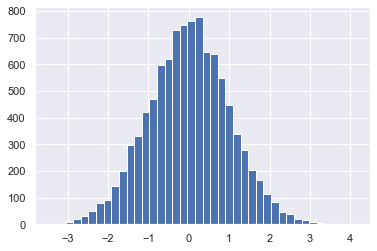

In [7]:
n, bins, patches = plt.hist(st.norm.rvs(loc=0,scale=1,size=10000),40)

Looks like this gives us normally distributed data!

## Now let's simulate two groups of normally distributed data and perform a t-test:

In [21]:
dataA = st.norm.rvs(loc=0,scale=1,size=20)
dataB = st.norm.rvs(loc=0,scale=1,size=20)
statistic, pvalue = st.ttest_ind(dataA,dataB)
print(statistic,pvalue)

0.3256400304385122 0.7464831313447161


## Seems to be working but the p-value changes from simulation to simulation, so let's check the distribution of p-values:

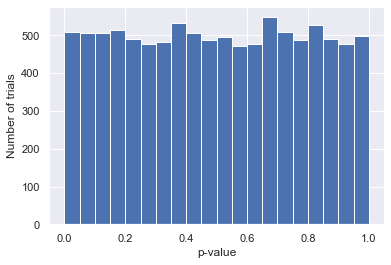

In [35]:
num_tests = 10000
pvalue_list = []
for i in range(num_tests): #range(N) = [0,1,2,3,...,N]
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=0,scale=1,size=20)
    statistic, pvalue = st.ttest_ind(dataA,dataB)
    pvalue_list.append(pvalue)

n, bins, patches = plt.hist(pvalue_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.show()

This is more or less uniform, which is what we expected.

## Now we can start to answer our question: How many false positives do we get in an experiment with N=40 tests?

In [40]:
num_tests = 40
num_false_positives = 0
for i in range(num_tests): #range(N) = [0,1,2,3,...,N]
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=0,scale=1,size=20)
    statistic, pvalue = st.ttest_ind(dataA,dataB)
    if pvalue < 0.05:
        num_false_positives+=1

print(str(num_false_positives)+" false positives")

1 false positives


## And if we try this experiment many times, how often do we get 0, 1, 2,... false positives?

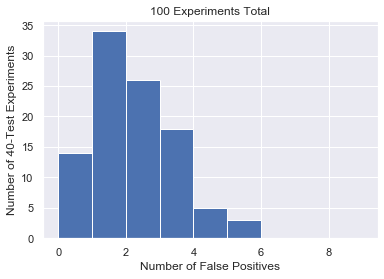

In [50]:
num_experiments = 100  #let's do this 40-test experiment a bunch of times
num_false_positives_list = []
for k in range(num_experiments):
    num_tests = 40
    num_false_positives = 0
    for i in range(num_tests): #range(N) = [0,1,2,3,...,N]
        dataA = st.norm.rvs(loc=0,scale=1,size=20)
        dataB = st.norm.rvs(loc=0,scale=1,size=20)
        statistic, pvalue = st.ttest_ind(dataA,dataB)
        if pvalue < 0.05:
            num_false_positives+=1
    num_false_positives_list.append(num_false_positives)
    
plt.hist(num_false_positives_list,bins = [0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Number of False Positives')
plt.ylabel('Number of '+str(num_tests)+'-Test Experiments')
plt.title(str(num_experiments)+' Experiments Total')
plt.show()

In [51]:
num_false_positives_array = np.array(num_false_positives_list)
len(num_false_positives_array[num_false_positives_array>2])

26

## Conclusion: It's very common to have more than 2 false positives.

# What Does the Distribution of P-Values Look Like Under the Alternate?

## Distribution of P-Values

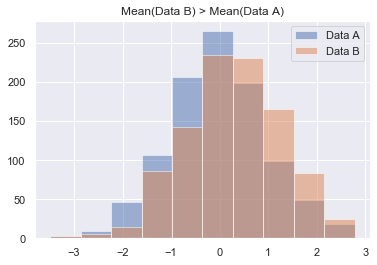

In [74]:
dataA = st.norm.rvs(loc=0,scale=1,size=1000)
dataB = st.norm.rvs(loc=0.25,scale=1,size=1000) #The mean for dataB is now different from dataA
n,bins,patches = plt.hist(dataA,label = 'Data A',alpha=0.5)
plt.hist(dataB,bins=bins,label = 'Data B',alpha=0.5)
plt.legend()
plt.title('Mean(Data B) > Mean(Data A)')
plt.show()

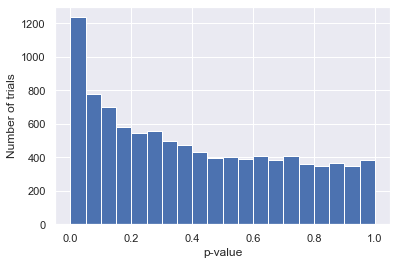

In [3]:
#I copied 1.3 below and only changed one line:

num_tests = 10000
pvalue_list = []
for i in range(num_tests):
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=0.25,scale=1,size=20) #The mean for dataB is now different from dataA
    statistic, pvalue = st.ttest_ind(dataA,dataB)
    pvalue_list.append(pvalue)

n, bins, patches = plt.hist(pvalue_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.show()

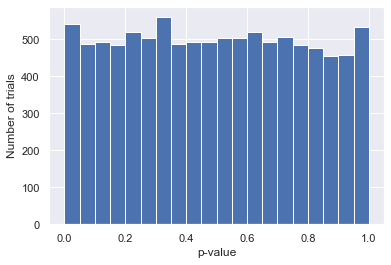

In [59]:
#If the change is small:

num_tests = 10000
pvalue_list = []
for i in range(num_tests):
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=0.05,scale=1,size=20) #The mean for dataB is now different from dataA
    statistic, pvalue = st.ttest_ind(dataA,dataB)
    pvalue_list.append(pvalue)

n, bins, patches = plt.hist(pvalue_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.show()

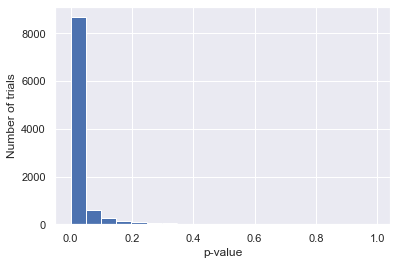

In [60]:
#If the change is large:

num_tests = 10000
pvalue_list = []
for i in range(num_tests):
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=1,scale=1,size=20) #The mean for dataB is now different from dataA
    statistic, pvalue = st.ttest_ind(dataA,dataB)
    pvalue_list.append(pvalue)

n, bins, patches = plt.hist(pvalue_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.show()

## This Is Also Commonly Viewed as a Q-Q Plot:

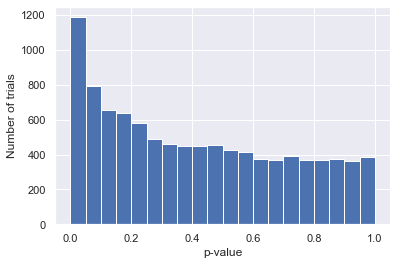

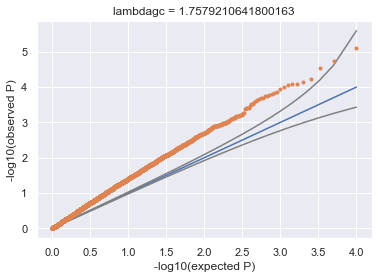

1.7579210641800163

In [6]:
def qqPlot(pvals):
    pvals = np.array(pvals)
    pvals = pvals[~pd.isnull(pvals)]
    n = len(pvals)
    xvals = np.arange(1.,n+1)
    obs = np.sort(pvals)
    exp = xvals/n
    robjects.globalenv['xvals']=np.resize(xvals,[len(xvals),1])
    robjects.globalenv['pvals']=np.resize(pvals,[len(pvals),1])
    upper = robjects.r('qbeta(0.025,xvals,rev(xvals))')
    upper.resize(len(upper))
    lower = robjects.r('qbeta(0.975,xvals,rev(xvals))')
    lower.resize(len(lower))
    robjects.r('chisq = qchisq(1-pvals,1)')
#     robjects.r('lambdagc = median(chisq)/qchisq(0.5,1)')
#     robjects.r('chisqCorrected = chisq*lambdagc')
#     pCorrected = robjects.r('1-pchisq(chisqCorrected,1)')
#     pCorrected.reshape(len(pCorrected),)
    lambdagc = robjects.r('median(chisq)/qchisq(0.5,1)')[0]
    plt.title('lambdagc = '+str(lambdagc))
    min_val = min(-np.log10(exp))
    max_val = max(-np.log10(exp))
    plt.plot([min_val,max_val],[min_val,max_val])
    plt.plot(-np.log10(exp),-np.log10(upper),c='grey')
    plt.plot(-np.log10(exp),-np.log10(lower),c='grey')
    plt.plot(-np.log10(exp),-np.log10(obs),'.')
    plt.xlabel('-log10(expected P)')
    plt.ylabel('-log10(observed P)')
    plt.show()
    
    return lambdagc



num_tests = 10000
pvalue_list = []
for i in range(num_tests):
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=0.25,scale=1,size=20) #The mean for dataB is now different from dataA
    statistic, pvalue = st.ttest_ind(dataA,dataB)
    pvalue_list.append(pvalue)

n, bins, patches = plt.hist(pvalue_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.show()

qqPlot(pvalue_list)

In [21]:
#Let's look at the adjusted p-values (FDR/BH):
pvalue_list = np.array(pvalue_list)
robjects.globalenv['pvalue_list']=np.resize(pvalue_list,[len(pvalue_list),1])
adjusted_pvalues = robjects.r('p.adjust(pvalue_list,"BH")') #p.adjust is the R command, "BH" or "fdr" give false discovery rate
print(sorted(pvalue_list)[0:10])
print(sorted(adjusted_pvalues)[0:10])
print(sorted(pvalue_list*len(pvalue_list))[0:10]) #This is a bonferroni correction but the option also exists in p.adjust

[7.785188391923002e-06, 1.7755953024079723e-05, 2.9282140285663672e-05, 5.9078750623536654e-05, 7.248526033710004e-05, 8.023718422956629e-05, 8.322770575904172e-05, 8.722930766644122e-05, 0.00010209057566724905, 0.00011112480578984869]
[0.07785188391923002, 0.08877976512039862, 0.09760713428554559, 0.10903663458305153, 0.10903663458305153, 0.10903663458305153, 0.10903663458305153, 0.10903663458305153, 0.11078973389620275, 0.11078973389620275]
[0.07785188391923002, 0.17755953024079724, 0.2928214028566367, 0.5907875062353666, 0.7248526033710004, 0.8023718422956629, 0.8322770575904173, 0.8722930766644122, 1.0209057566724906, 1.111248057898487]


These numbers were pasted into the PPT (it's prettier there)

# Permutation Test Example

In [132]:
def permute_test(GroupA,GroupB):
    GroupA = np.array(GroupA)
    GroupB = np.array(GroupB)
    combined = np.append(GroupA,GroupB)
    np.random.shuffle(combined)
    GroupAPrime = combined[:len(GroupA)]
    GroupBPrime = combined[len(GroupA):]
    print(GroupAPrime)
    print(GroupBPrime)
    return

In [133]:
permute_test(GroupA,GroupB)

[62 12 35 39 18  1 90]
[10632    33     9   110    16    29    17]


In [109]:
def permute_once(GroupA,GroupB):
    GroupA = np.array(GroupA)
    GroupB = np.array(GroupB)
    combined = np.append(GroupA,GroupB)
    np.random.shuffle(combined)
    GroupAPrime = combined[:len(GroupA)]
    GroupBPrime = combined[len(GroupA):]
    return np.median(GroupAPrime)-np.median(GroupBPrime)

In [127]:
GroupA = [35,12,18,90,10632,1,16]
GroupB = [62,39,9,110,33,29,17]
print(np.median(GroupA)-np.median(GroupB))

-15.0


In [121]:
for i in range(10):
    print(permute_once(GroupA,GroupB))

-10.0
-4.0
21.0
45.0
-6.0
4.0
-15.0
-6.0
10.0
-4.0


In [122]:
median_list = []
for i in range(1000):
    median_list.append(permute_once(GroupA,GroupB))

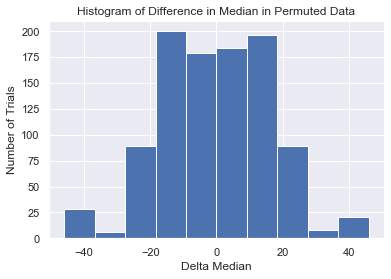

In [136]:
n,bins,patches=plt.hist(median_list)
plt.xlabel('Delta Median')
plt.ylabel('Number of Trials')
plt.title('Histogram of Difference in Median in Permuted Data')
plt.show()

In [131]:
median_array = np.array(median_list)
print(len(median_array[abs(median_array)>15]))

478


# Wilcoxon-Mann-Whitney Example

In [145]:
GroupA = [100,101,102,103]
GroupB = [0,1,2,3]
print(st.mannwhitneyu(GroupA,GroupB))
print(st.ttest_ind(GroupA,GroupB))


MannwhitneyuResult(statistic=0.0, pvalue=0.015191410988288745)
Ttest_indResult(statistic=109.54451150103321, pvalue=3.9011276576104784e-11)


In [22]:
?st.mannwhitneyu

In [141]:
?st.wilcoxon

# How to Test Statistical Software?